<a href="https://colab.research.google.com/github/agargya123/people_analytics/blob/avantika-org5/Version2_The_Metrics_Mafia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Data Cleaning and Processing on the original Dataset

In [ ]:
#Importing the relevant libraries
import os
import os.path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
uploaded = files.upload()

Saving WPA_DataCase_2024 (1).csv to WPA_DataCase_2024 (1) (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv(next(iter(uploaded)))
df.head()

,DEMO_Org,DEMO_meeting_remote,DEMO_Dept,OBSV_PreC_Location_A_primryoffice,OBSV_PreC_Location_B_officeother,OBSV_PreC_Location_C_client,OBSV_PreC_Location_D_WFH,OBSV_PreC_Location_E_publicspace,OBSV_PreC_Location_F_transit,OBSV_PreC_Location_G_other,OBSV_Now_Interact_Work_within_org,OBSV_PreC_meeting_A_inperson,OBSV_PreC_meeting_B_hyrbid,OBSV_PreC_meeting_C_remote,OBSV_PreC_interative_A_inperson,OBSV_PreC_interative_B_remote,OBSV_same_space_count_A_1,OBSV_same_space_count_B_2n3,OBSV_same_space_count_C_4n9,OBSV_same_space_count_D_10p,OBSV_PreC_meetingsize0ffice_A_1,OBSV_PreC_meetingsize0ffice_B_2n3,OBSV_PreC_meetingsize0ffice_C_4n9,OBSV_PreC_wiOffice_A_desk,OBSV_PreC_wiOffice_B_otherdeck,OBSV_PreC_wiOffice_C_meetingrm,OBSV_PreC_wiOffice_D_lobby,OBSV_PreC_wiOffice_E_speicaltyarea,OBSV_PreC_wiOffice_F_other,OBSV_PreC_space_A_InformalMtg,OBSV_PreC_space_B_FormalMtg,OBSV_PreC_5A_lost_layout,OBSV_PreC_5B_lost_looking,OBSV_PreC_5C_lost_perstech,OBSV_PreC_5D_lost_roomtech,OBSV_PreC_5E_lost_visitors,OBSV_PreC_5F_lost_noise,OBSV_PreC_5G_lost_comms,OBSV_PreC_5H_lost_ergo,OBSV_PreC_5I_lost_temp,OBSV_PreC_5J_lost_odor,OBSV_PreC_5K_lost_natlight,OBSV_PreC_5L_lost_indoorlight,PostC_impact_RankDifficult_A_MH,PostC_impact_RankDifficult_B_community,PostC_impact_RankDifficult_C_Communication,PostC_impact_RankDifficult_D_Tech,PostC_impact_RankDifficult_E_space,PostC_impact_RankDifficult_F_Environment,PostC_impact_shift_D_videoconf,PostC_impact_shift_E_innovate,DECSN_factors_E_commutelength,DECSN_factors_F_collabtools,DECSN_factors_G_concentrate,DECSN_factors_H_purpose,DECSN_factors_I_coworkerspresence,DECSN_factors_J_teampresence,DECSN_factors_K_socialevents,DECSN_factors_L_community,DECSN_factors_M_metorship,DECSN_factors_N_neighorhood,DECSN_factors_O_food,DECSN_factors_P_family,DECSN_factors_Q_leadership,PREF_space_A_focusedWk,PREF_Envr_Focus_1A_activity,PREF_Envr_Focus_1B_closure,PREF_Envr_Focus_1C_remote,PREF_Envr_Focus_1D_color,PREF_Envr_Focus_1E_light,PREF_Envr_Focus_1F_formality,PREF_Envr_Focus_1H_energy,PREF_Envr_Collab_2A_activity,PREF_Envr_Collab_2B_closure,PREF_Envr_Collab_2C_remote,PREF_Envr_Collab_2D_color,PREF_Envr_Collab_2E_light,PREF_Envr_Collab_2F_formality,PREF_Envr_Collab_2H_energy,PREF_features_A_chair,PREF_features_B_proximitry,PREF_features_C_concentration,PREF_features_D_privacy,PREF_features_E_noise,PREF_features_F_daylight,PREF_features_G_light,PREF_features_H_nature,PREF_features_I_Sychro,PREF_features_J_collabspace,PREF_features_K_temp,PREF_features_L_clean,PREF_features_M_lockers,PREF_features_N_events,PREF_features_O_food,PREF_features_Q_kitchen,PREF_features_R_gym,PREF_features_S_relax,PREF_features_T_greenspace,PREF_CollabSpace_A_tech,PREF_CollabSpace_B_software,PREF_CollabSpace_C_CollabTools,PREF_CollabSpace_D_furniture,PREF_CollabSpace_E_seating,PREF_CollabSpace_F_naturallight,PREF_CollabSpace_G_acoustics,SATSF_CollabSpace_A_Tech,SATSF_CollabSpace_B_software,SATSF_CollabSpace_C_CollabTools,SATSF_CollabSpace_D_furniture,SATSF_CollabSpace_E_seating,SATSF_CollabSpace_F_naturallight,SATSF_CollabSpace_G_acoustics,SATSF_HomeOffice_A_Tech,SATSF_HomeOffice_B_software,SATSF_HomeOffice_C_CollabTools,SATSF_HomeOffice_D_furniture,SATSF_HomeOffice_E_seating,SATSF_HomeOffice_F_naturallight,SATSF_HomeOffice_G_acoustics,SATSF_office_A_community,SATSF_office_B_designexcellence,SATSF_office_C_pride,SATSF_office_D_expressme,SATSF_office_E_control,SATSF_office_F_wellbeing,SATSF_office_G_myfamily,SATSF_office_H_customers,SATSF_office_I_orgcullture,SATSF_office_J_knowledgeshare,SATSF_office_K_planet,SATSF_facilitate_Home_1A_focus,SATSF_facilitate_Home_1B_inpersoncollab,SATSF_facilitate_Home_1C_virtualcollab,SATSF_facilitate_Office_2A_focus,SATSF_facilitate_Office_2B_inpersoncollab,SATSF_facilitate_Office_2C_virtualcollab,SATSF_facilitate_HomeTech_3A_virtualcollab,SATSF_facilitate_HomeTech_3B_inpersoncollab,SATSF_facilitate_HomeTech_3C_virtualcollab,SATSF_facilitate_OfficeTech_4A_virtualcollab,SATSF_facilitate_OfficeTech_4B_inpersoncolla

In [ ]:
df.describe()

,OBSV_PreC_Location_A_primryoffice,OBSV_PreC_Location_B_officeother,OBSV_PreC_Location_C_client,OBSV_PreC_Location_D_WFH,OBSV_PreC_Location_E_publicspace,OBSV_PreC_Location_F_transit,OBSV_PreC_Location_G_other,OBSV_Now_Interact_Work_within_org,OBSV_PreC_meeting_A_inperson,OBSV_PreC_meeting_B_hyrbid,OBSV_PreC_meeting_C_remote,OBSV_PreC_interative_A_inperson,OBSV_PreC_interative_B_remote,OBSV_same_space_count_A_1,OBSV_same_space_count_B_2n3,OBSV_same_space_count_C_4n9,OBSV_same_space_count_D_10p,OBSV_PreC_meetingsize0ffice_A_1,OBSV_PreC_meetingsize0ffice_B_2n3,OBSV_PreC_meetingsize0ffice_C_4n9,OBSV_PreC_wiOffice_A_desk,OBSV_PreC_wiOffice_B_otherdeck,OBSV_PreC_wiOffice_C_meetingrm,OBSV_PreC_wiOffice_D_lobby,OBSV_PreC_wiOffice_E_speicaltyarea,OBSV_PreC_wiOffice_F_other,OBSV_PreC_5A_lost_layout,OBSV_PreC_5B_lost_looking,OBSV_PreC_5C_lost_perstech,OBSV_PreC_5D_lost_roomtech,OBSV_PreC_5E_lost_visitors,OBSV_PreC_5F_lost_noise,OBSV_PreC_5G_lost_comms,OBSV_PreC_5H_lost_ergo,OBSV_PreC_5I_lost_temp,OBSV_PreC_5J_lost_odor,OBSV_PreC_5K_lost_natlight,OBSV_PreC_5L_lost_indoorlight,PostC_impact_RankDifficult_A_MH,PostC_impact_RankDifficult_B_community,PostC_impact_RankDifficult_C_Communication,PostC_impact_RankDifficult_D_Tech,PostC_impact_RankDifficult_E_space,PostC_impact_RankDifficult_F_Environment,PostC_impact_shift_D_videoconf,PostC_impact_shift_E_innovate,DECSN_factors_E_commutelength,DECSN_factors_F_collabtools,DECSN_factors_G_concentrate,DECSN_factors_H_purpose,DECSN_factors_I_coworkerspresence,DECSN_factors_J_teampresence,DECSN_factors_K_socialevents,DECSN_factors_L_community,DECSN_factors_M_metorship,DECSN_factors_N_neighorhood,DECSN_factors_O_food,DECSN_factors_P_family,DECSN_factors_Q_leadership,PREF_Envr_Focus_1A_activity,PREF_Envr_Focus_1B_closure,PREF_Envr_Focus_1C_remote,PREF_Envr_Focus_1D_color,PREF_Envr_Focus_1E_light,PREF_Envr_Focus_1F_formality,PREF_Envr_Focus_1H_energy,PREF_Envr_Collab_2A_activity,PREF_Envr_Collab_2B_closure,PREF_Envr_Collab_2C_remote,PREF_Envr_Collab_2D_color,PREF_Envr_Collab_2E_light,PREF_Envr_Collab_2F_formality,PREF_Envr_Collab_2H_energy,OBSV_PreC_WFH_Days_Wk,PREF_WFK_rate_home,PostC_impact_shift_A_focus,PostC_impact_shift_B_productive,PostC_impact_shift_C_collab,PostC_impact_shift_F_colleagueaccess,PostC_impact_shift_G_teammeetings,PostC_impact_shift_H_social,PostC_impact_shift_I_managersconnect,PostC_impact_shift_J_client,PostC_impact_shift_K_enjoy,DECSN_factors_A_noinpersonmtgs,DECSN_factors_B_healthwellness,DECSN_factors_C_WrkLifeSep,DECSN_factors_D_safety,OBSV_Now_WrkTimeA_Indiv_fract_vCollab,OBSV_PreC_meetingsize0ffice_D_10plus
count,348.000000,130.000000,98.000000,255.000000,67.000000,88.000000,80.000000,240.000000,691.000000,672.000000,556.000000,144.000000,136.000000,338.000000,308.000000,301.000000,250.000000,479.000000,519.000000,532.000000,707.000000,562.000000,626.000000,422.000000,305.000000,382.000000,322.000000,405.000000,362.000000,343.000000,405.000000,386.000000,394.000000,309.000000,335.000000,306.000000,308.000000,320.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,372.000000,1298.000000,512.000000,503.000000,375.000000,503.000000,129.000000,504.000000,375.00000,375.000000,503.000000,502.000000,375.000000,501.000000,505.000000,544.000000,563.000000,553.000000,633.000000,689.000000,596.000000,647.000000,634.00000,639.000000,639.000000,659.000000,699.000000,637.000000,676.000000,465.000000,1006.000000,1136.000000,837.000000,1378.000000,837.000000,541.000000,1136.000000,1056.000000,595.000000,1056.000000,350.000000,475.00000,512.000000,125.000000,842.000000,183.000000
mean,0.661310,0.069346,0.188837,0.345922,0.026716,0.087091,0.133487,0.528500,0.492740,0.382021,0.255932,0.623819,0.440956,0.413254,0.309383,0.316312,0.164800,0.313278,0.342987,0.357932,0.479717,0.219942,0.186777,0.206031,0.213951,0.187003,43.062112,48.592593,55.643646,28.230321,124.620988,70.694301,92.956853,24.132686,33.802985,12.058824,17.876623,29.881250,1.972043,3.647312,2.892473,2.425806,2.1

In [ ]:
#Displaying the full dataframe
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 2000)
df_null = df.isnull().sum()
total_rows = len(df)
null_info = pd.DataFrame({'Null Count': df_null, 'Total Rows': total_rows, '% Null': (df_null / total_rows) * 100})
#null_info

"A **Likert scale** is a rating scale used to measure opinions, attitudes, or behaviors. It consists of a statement or a question, followed by a series of five or seven answer statements. Respondents choose the option that best corresponds with how they feel about the statement or question." There were a lot of columns that captured the data in that manner. We identified those columns and converted them to a 1-5 scale for easy calculation of the output.

In [ ]:
#capture 3 likert columns sets
target_words1 = ['important', 'unimportant','Very important','Very unimportant']
target_words2 = ['satisfied', 'very satisfied','very dissatisfied','dissatisfied']
target_words3 = ['strongly agree', 'agree','disagree','strongly disagree']
likert1 = []
likert2 = []
likert3 = []
for col in df.columns:
    if any(df[col].astype(str).str.contains('|'.join(target_words1), case=False, na=False)):
        likert1.append(col)
likertset1 = set(likert1)

for col in df.columns:
    if any(df[col].astype(str).str.contains('|'.join(target_words2), case=False, na=False)):
        likert2.append(col)
likertset2 = set(likert2)

for col in df.columns:
    if any(df[col].astype(str).str.contains('|'.join(target_words3), case=False, na=False)):
        likert3.append(col)
likertset3 = set(likert3)
likertset3

{'Etc1_WLB_improved',
 'Etc2_chooseWFH',
 'Etc3_no_workstation',
 'Etc4_justlaptop',
 'Etc5_teamclose',
 'Etc6_connected',
 'Etc7_priorities',
 'Etc8_WFK_efffective'}

In [ ]:
#CONVERT LIKERT STRING TO NUMERIC so that we can the preference of the employees can be captured well.
likert_scale_1 = {'Very important':'5', 'Important':'4','Neutral':'3', 'Unimportant':'2', 'Very unimportant':'1'}#, 'NA':'0'}
likert_scale_2 = {'Very satisfied':'5', 'Satisfied':'4','Neutral':'3', 'Dissatisfied':'2', 'Unsatisfied':'2', 'Very dissatisfied':'1', 'Very unsatisfied':'1'}#, 'NA':'0'}
likert_scale_3 = {'Strongly agree':'5', 'Agree':'4','Neutral':'3', 'Disagree':'2', 'Strongly disagree':'1'}

for col in likertset1 :
  df[col] = df[col].replace(likert_scale_1)
for col in likertset2 :
  df[col] = df[col].replace(likert_scale_2)
for col in likertset3 :
  df[col] = df[col].replace(likert_scale_3)

In [ ]:
#convert workrate
df['PREF_WFK_rate_home'] = df['PREF_WFK_rate_home']*5
df['PREF_WFK_rate_home'].head(10)

0    NaN
1    NaN
2    NaN
3    NaN
4    5.0
5    2.0
6    NaN
7    NaN
8    3.0
9    0.5
Name: PREF_WFK_rate_home, dtype: float64

The **Percentage columns** contain the split of a percentage number from 0-1 between the options. (OBSV_PreC_meeting_A_inperson, hybrid, remote). The data is present as (NA, 1, NA) , (0.3, 0.7, NA) and so on in these groups. This means that not every NA in this column indicates an unanswered question, it means that the value should instead be replaced with a numerical zero.

In [ ]:
#percentage change to replace NA with zero
percent_columns = ['OBSV_PreC_interative_A_inperson',
'OBSV_PreC_interative_B_remote',
'OBSV_PreC_meetingsize0ffice_A_1',
'OBSV_PreC_meetingsize0ffice_B_2n3',
'OBSV_PreC_meetingsize0ffice_C_4n9',
'OBSV_PreC_meetingsize0ffice_D_10plus',
'OBSV_PreC_meeting_A_inperson',
'OBSV_PreC_meeting_B_hyrbid',
'OBSV_PreC_meeting_C_remote',
'OBSV_same_space_count_A_1',
'OBSV_same_space_count_B_2n3',
'OBSV_same_space_count_C_4n9',
'OBSV_same_space_count_D_10p',
'OBSV_PreC_Location_A_primryoffice',
'OBSV_PreC_Location_B_officeother',
'OBSV_PreC_Location_C_client',
'OBSV_PreC_Location_D_WFH',
'OBSV_PreC_Location_E_publicspace',
'OBSV_PreC_Location_F_transit',
'OBSV_PreC_Location_G_other',
'OBSV_PreC_wiOffice_A_desk',
'OBSV_PreC_wiOffice_B_otherdeck',
'OBSV_PreC_wiOffice_C_meetingrm',
'OBSV_PreC_wiOffice_D_lobby',
'OBSV_PreC_wiOffice_E_speicaltyarea',
'OBSV_PreC_wiOffice_F_other',
'OBSV_Now_Interact_Work_within_org',
'OBSV_Now_WrkTimeA_Indiv_fract_vCollab',
'OBSV_PreC_interative_A_inperson',
'OBSV_PreC_interative_B_remote',
'OBSV_PreC_meetingsize0ffice_A_1',
'OBSV_PreC_meetingsize0ffice_B_2n3',
'OBSV_PreC_meetingsize0ffice_C_4n9',
'OBSV_PreC_meetingsize0ffice_D_10plus',
'OBSV_PreC_meeting_A_inperson',
'OBSV_PreC_meeting_B_hyrbid',
'OBSV_PreC_meeting_C_remote',
'OBSV_same_space_count_A_1',
'OBSV_same_space_count_B_2n3',
'OBSV_same_space_count_C_4n9',
'OBSV_same_space_count_D_10p',
'OBSV_PreC_Location_A_primryoffice',
'OBSV_PreC_Location_B_officeother',
'OBSV_PreC_Location_C_client',
'OBSV_PreC_Location_D_WFH',
'OBSV_PreC_Location_E_publicspace',
'OBSV_PreC_Location_F_transit',
'OBSV_PreC_Location_G_other',
'OBSV_PreC_wiOffice_A_desk',
'OBSV_PreC_wiOffice_B_otherdeck',
'OBSV_PreC_wiOffice_C_meetingrm',
'OBSV_PreC_wiOffice_D_lobby',
'OBSV_PreC_wiOffice_E_speicaltyarea',
'OBSV_PreC_wiOffice_F_other',
'OBSV_Now_Interact_Work_within_org',
'OBSV_Now_WrkTimeA_Indiv_fract_vCollab']

for col in percent_columns :
  df[col] = df[col].fillna(0)

There are two columns containing **Yes/No**. We converted them to a binary 1/0 variable

In [ ]:
for col in ['DEMO_Tenure_PreC_employee','DEMO_meeting_remote']:
  for i in range(len(df)):
    if df[col].iloc[i] == "Yes":
      df[col].iloc[i] = 1
    elif df[col].iloc[i] == "No":
      df[col].iloc[i] = 0

<ipython-input-27-29ac244997a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].iloc[i] = 1
<ipython-input-27-29ac244997a4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].iloc[i] = 0


Next, after processing the whole data we divided it into the different organisations

In [ ]:
df1 = df[df['DEMO_Org'] == 'Org 1']
df2 = df[df['DEMO_Org'] == 'Org 2']
df3 = df[df['DEMO_Org'] == 'Org 3']
df4 = df[df['DEMO_Org'] == 'Org 4']
df5 = df[df['DEMO_Org'] == 'Org 5']
df1.head()

,DEMO_Org,DEMO_meeting_remote,DEMO_Dept,OBSV_PreC_Location_A_primryoffice,OBSV_PreC_Location_B_officeother,OBSV_PreC_Location_C_client,OBSV_PreC_Location_D_WFH,OBSV_PreC_Location_E_publicspace,OBSV_PreC_Location_F_transit,OBSV_PreC_Location_G_other,OBSV_Now_Interact_Work_within_org,OBSV_PreC_meeting_A_inperson,OBSV_PreC_meeting_B_hyrbid,OBSV_PreC_meeting_C_remote,OBSV_PreC_interative_A_inperson,OBSV_PreC_interative_B_remote,OBSV_same_space_count_A_1,OBSV_same_space_count_B_2n3,OBSV_same_space_count_C_4n9,OBSV_same_space_count_D_10p,OBSV_PreC_meetingsize0ffice_A_1,OBSV_PreC_meetingsize0ffice_B_2n3,OBSV_PreC_meetingsize0ffice_C_4n9,OBSV_PreC_wiOffice_A_desk,OBSV_PreC_wiOffice_B_otherdeck,OBSV_PreC_wiOffice_C_meetingrm,OBSV_PreC_wiOffice_D_lobby,OBSV_PreC_wiOffice_E_speicaltyarea,OBSV_PreC_wiOffice_F_other,OBSV_PreC_space_A_InformalMtg,OBSV_PreC_space_B_FormalMtg,OBSV_PreC_5A_lost_layout,OBSV_PreC_5B_lost_looking,OBSV_PreC_5C_lost_perstech,OBSV_PreC_5D_lost_roomtech,OBSV_PreC_5E_lost_visitors,OBSV_PreC_5F_lost_noise,OBSV_PreC_5G_lost_comms,OBSV_PreC_5H_lost_ergo,OBSV_PreC_5I_lost_temp,OBSV_PreC_5J_lost_odor,OBSV_PreC_5K_lost_natlight,OBSV_PreC_5L_lost_indoorlight,PostC_impact_RankDifficult_A_MH,PostC_impact_RankDifficult_B_community,PostC_impact_RankDifficult_C_Communication,PostC_impact_RankDifficult_D_Tech,PostC_impact_RankDifficult_E_space,PostC_impact_RankDifficult_F_Environment,PostC_impact_shift_D_videoconf,PostC_impact_shift_E_innovate,DECSN_factors_E_commutelength,DECSN_factors_F_collabtools,DECSN_factors_G_concentrate,DECSN_factors_H_purpose,DECSN_factors_I_coworkerspresence,DECSN_factors_J_teampresence,DECSN_factors_K_socialevents,DECSN_factors_L_community,DECSN_factors_M_metorship,DECSN_factors_N_neighorhood,DECSN_factors_O_food,DECSN_factors_P_family,DECSN_factors_Q_leadership,PREF_space_A_focusedWk,PREF_Envr_Focus_1A_activity,PREF_Envr_Focus_1B_closure,PREF_Envr_Focus_1C_remote,PREF_Envr_Focus_1D_color,PREF_Envr_Focus_1E_light,PREF_Envr_Focus_1F_formality,PREF_Envr_Focus_1H_energy,PREF_Envr_Collab_2A_activity,PREF_Envr_Collab_2B_closure,PREF_Envr_Collab_2C_remote,PREF_Envr_Collab_2D_color,PREF_Envr_Collab_2E_light,PREF_Envr_Collab_2F_formality,PREF_Envr_Collab_2H_energy,PREF_features_A_chair,PREF_features_B_proximitry,PREF_features_C_concentration,PREF_features_D_privacy,PREF_features_E_noise,PREF_features_F_daylight,PREF_features_G_light,PREF_features_H_nature,PREF_features_I_Sychro,PREF_features_J_collabspace,PREF_features_K_temp,PREF_features_L_clean,PREF_features_M_lockers,PREF_features_N_events,PREF_features_O_food,PREF_features_Q_kitchen,PREF_features_R_gym,PREF_features_S_relax,PREF_features_T_greenspace,PREF_CollabSpace_A_tech,PREF_CollabSpace_B_software,PREF_CollabSpace_C_CollabTools,PREF_CollabSpace_D_furniture,PREF_CollabSpace_E_seating,PREF_CollabSpace_F_naturallight,PREF_CollabSpace_G_acoustics,SATSF_CollabSpace_A_Tech,SATSF_CollabSpace_B_software,SATSF_CollabSpace_C_CollabTools,SATSF_CollabSpace_D_furniture,SATSF_CollabSpace_E_seating,SATSF_CollabSpace_F_naturallight,SATSF_CollabSpace_G_acoustics,SATSF_HomeOffice_A_Tech,SATSF_HomeOffice_B_software,SATSF_HomeOffice_C_CollabTools,SATSF_HomeOffice_D_furniture,SATSF_HomeOffice_E_seating,SATSF_HomeOffice_F_naturallight,SATSF_HomeOffice_G_acoustics,SATSF_office_A_community,SATSF_office_B_designexcellence,SATSF_office_C_pride,SATSF_office_D_expressme,SATSF_office_E_control,SATSF_office_F_wellbeing,SATSF_office_G_myfamily,SATSF_office_H_customers,SATSF_office_I_orgcullture,SATSF_office_J_knowledgeshare,SATSF_office_K_planet,SATSF_facilitate_Home_1A_focus,SATSF_facilitate_Home_1B_inpersoncollab,SATSF_facilitate_Home_1C_virtualcollab,SATSF_facilitate_Office_2A_focus,SATSF_facilitate_Office_2B_inpersoncollab,SATSF_facilitate_Office_2C_virtualcollab,SATSF_facilitate_HomeTech_3A_virtualcollab,SATSF_facilitate_HomeTech_3B_inpersoncollab,SATSF_facilitate_HomeTech_3C_virtualcollab,SATSF_facilitate_OfficeTech_4A_virtualcollab,SATSF_facilitate_OfficeTech_4B_inpersoncolla

We wrote this output into an excel file, divided by organisation.

In [ ]:
with pd.ExcelWriter('/content/output_file.xlsx') as writer:
    df.to_excel(writer, sheet_name='All Orgs', index=False, na_rep='NaN')
    df1.to_excel(writer, sheet_name='Org 1', index=False, na_rep='NaN')
    df2.to_excel(writer, sheet_name='Org 2', index=False, na_rep='NaN')
    df3.to_excel(writer, sheet_name='Org 3', index=False, na_rep='NaN' )
    df4.to_excel(writer, sheet_name='Org 4', index=False, na_rep='NaN')
    df5.to_excel(writer, sheet_name='Org 5', index=False, na_rep='NaN')

from google.colab import files
files.download('/content/output_file.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2. Processing for different organisations

In [3]:
#upload file
import os
import os.path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
from google.colab import drive

uploaded = files.upload()


Saving output_file (2).xlsx to output_file (2).xlsx


### For each organisation -
<ul>
<li> Remove columns containing null values for 90-100% of the rows
<li> Drop any rows that have >85% nulls across columns
<li> For rows containing less than 20% null values across columns, impute with mean of the column
<li> For the remaining nulls, impute by average of job function or mode of that column (string variables)
</ul>

E.g. Organisation 5

In [4]:
#import your page from excel as dataframe
import pandas as pd
#org_3 = pd.read_excel(next(iter(uploaded)), sheet_name = "Org 3")
org5 = pd.read_excel(next(iter(uploaded)), sheet_name = "Org 5")
org5

,DEMO_Org,DEMO_meeting_remote,DEMO_Dept,OBSV_PreC_Location_A_primryoffice,OBSV_PreC_Location_B_officeother,OBSV_PreC_Location_C_client,OBSV_PreC_Location_D_WFH,OBSV_PreC_Location_E_publicspace,OBSV_PreC_Location_F_transit,OBSV_PreC_Location_G_other,...,DECSN_factors_C_WrkLifeSep,DECSN_factors_D_safety,OBSV_Now_WrkTimeA_Indiv_fract_vCollab,OBSV_PreC_meetingsize0ffice_D_10plus,PREF_space_B_inperson_collab,PREF_space_C_videoconf,PREF_space_D_impromptu,PREF_space_E_recharge,PREF_space_F_accessible,PREF_space_G_firstarrive
0,Org 5,NaN,Operations and Support,0,0,0,0,0,0,0,...,NaN,NaN,0,0,Home,Home,Elsewhere in the building,NaN,Anywhere outside the office building,NaN
1,Org 5,NaN,Operations and Support,0,0,0,0,0,0,0,...,NaN,NaN,0,0,"Semi-enclosed space (nook, booth)","Semi-enclosed space (nook, booth)","Open space (cafe, lounge)",NaN,Anywhere outside the office building,NaN
2,Org 5,NaN,Operations and Support,0,0,0,0,0,0,0,...,NaN,NaN,0,0,"Enclosed room (meeting room, phone room)",Home,"Open space (cafe, lounge)",NaN,Anywhere outside the office building,NaN
3,Org 5,NaN,Operations and Support,0,0,0,0,0,0,0,...,NaN,NaN,0,0,"Enclosed room (meeting room, phone room)","Enclosed room (meeting room, phone room)","Enclosed room (meeting room, phone room)",NaN,"Open space (cafe, lounge)",NaN
4,Org 5,NaN,Operations and Support,0,0,0,0,0,0,0,...,NaN,NaN,0,0,"Enclosed room (meeting room, phone room)",Home,Home,NaN,Anywhere outside the office building,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,Org 5,NaN,Workplace & Tech Services,0,0,0,0,0,0,0,...,NaN,NaN,0,0,"Semi-enclosed space (nook, booth)","Enclosed room (meeting room, phone room)","Open space (cafe, lounge)",NaN,"Open space (cafe, lounge)",NaN
537,Org 5,NaN,Workplace & Tech Services,0,0,0,0,0,0,0,...,NaN,NaN,0,0,"Semi-enclosed space (nook, booth)","Semi-enclosed space (nook, booth)","Semi-enclosed space (nook, booth)",NaN,"Open space (cafe, lounge)",NaN
538,Org 5,NaN,Workplace & Tech Services,0,0,0,0,0,0,0,...,NaN,NaN,0,0,"Semi-enclosed space (nook, booth)","Enclosed room (meeting room, phone room)","Semi-enclosed space (nook, booth)",NaN,Anywhere outside the office building,NaN
539,Org 5,NaN,Workplace & Tech Services,0,0,0,0,0,0,0,...,NaN,NaN,0,0,"Enclosed room (meeting room, phone room)","Enclosed room (meeting room, phone room)","Open space (cafe, lounge)",NaN,"Enclosed room (meeting room, phone room)",NaN


In [5]:
#Drop all null cols
df_null = org5.isnull().sum()
r = len(org5)
null_info = pd.DataFrame({'Null Count': df_null, 'Total Rows': r, '% Null': (df_null / r) * 100})
nullcols = null_info[null_info['% Null'] >= 90.0]
df_col_dropped =  org5.drop(columns=nullcols.index.tolist())

In [6]:
org5

,DEMO_Org,DEMO_meeting_remote,DEMO_Dept,OBSV_PreC_Location_A_primryoffice,OBSV_PreC_Location_B_officeother,OBSV_PreC_Location_C_client,OBSV_PreC_Location_D_WFH,OBSV_PreC_Location_E_publicspace,OBSV_PreC_Location_F_transit,OBSV_PreC_Location_G_other,...,DECSN_factors_C_WrkLifeSep,DECSN_factors_D_safety,OBSV_Now_WrkTimeA_Indiv_fract_vCollab,OBSV_PreC_meetingsize0ffice_D_10plus,PREF_space_B_inperson_collab,PREF_space_C_videoconf,PREF_space_D_impromptu,PREF_space_E_recharge,PREF_space_F_accessible,PREF_space_G_firstarrive
0,Org 5,NaN,Operations and Support,0,0,0,0,0,0,0,...,NaN,NaN,0,0,Home,Home,Elsewhere in the building,NaN,Anywhere outside the office building,NaN
1,Org 5,NaN,Operations and Support,0,0,0,0,0,0,0,...,NaN,NaN,0,0,"Semi-enclosed space (nook, booth)","Semi-enclosed space (nook, booth)","Open space (cafe, lounge)",NaN,Anywhere outside the office building,NaN
2,Org 5,NaN,Operations and Support,0,0,0,0,0,0,0,...,NaN,NaN,0,0,"Enclosed room (meeting room, phone room)",Home,"Open space (cafe, lounge)",NaN,Anywhere outside the office building,NaN
3,Org 5,NaN,Operations and Support,0,0,0,0,0,0,0,...,NaN,NaN,0,0,"Enclosed room (meeting room, phone room)","Enclosed room (meeting room, phone room)","Enclosed room (meeting room, phone room)",NaN,"Open space (cafe, lounge)",NaN
4,Org 5,NaN,Operations and Support,0,0,0,0,0,0,0,...,NaN,NaN,0,0,"Enclosed room (meeting room, phone room)",Home,Home,NaN,Anywhere outside the office building,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,Org 5,NaN,Workplace & Tech Services,0,0,0,0,0,0,0,...,NaN,NaN,0,0,"Semi-enclosed space (nook, booth)","Enclosed room (meeting room, phone room)","Open space (cafe, lounge)",NaN,"Open space (cafe, lounge)",NaN
537,Org 5,NaN,Workplace & Tech Services,0,0,0,0,0,0,0,...,NaN,NaN,0,0,"Semi-enclosed space (nook, booth)","Semi-enclosed space (nook, booth)","Semi-enclosed space (nook, booth)",NaN,"Open space (cafe, lounge)",NaN
538,Org 5,NaN,Workplace & Tech Services,0,0,0,0,0,0,0,...,NaN,NaN,0,0,"Semi-enclosed space (nook, booth)","Enclosed room (meeting room, phone room)","Semi-enclosed space (nook, booth)",NaN,Anywhere outside the office building,NaN
539,Org 5,NaN,Workplace & Tech Services,0,0,0,0,0,0,0,...,NaN,NaN,0,0,"Enclosed room (meeting room, phone room)","Enclosed room (meeting room, phone room)","Open space (cafe, lounge)",NaN,"Enclosed room (meeting room, phone room)",NaN


In [7]:
#Create list of columns to be treated differently
likert_cols = ['SATSF_CollabSpace_A_Tech',
 'SATSF_CollabSpace_B_software',
 'SATSF_CollabSpace_C_CollabTools',
 'SATSF_CollabSpace_D_furniture',
 'SATSF_CollabSpace_E_seating',
 'SATSF_CollabSpace_F_naturallight',
 'SATSF_CollabSpace_G_acoustics',
 'SATSF_HomeOffice_A_Tech',
 'SATSF_HomeOffice_B_software',
 'SATSF_HomeOffice_C_CollabTools',
 'SATSF_HomeOffice_D_furniture',
 'SATSF_HomeOffice_E_seating',
 'SATSF_HomeOffice_F_naturallight',
 'SATSF_HomeOffice_G_acoustics',
 'SATSF_facilitate_HomeTech_3A_virtualcollab',
 'SATSF_facilitate_HomeTech_3B_inpersoncollab',
 'SATSF_facilitate_HomeTech_3C_virtualcollab',
 'SATSF_facilitate_Home_1A_focus',
 'SATSF_facilitate_Home_1B_inpersoncollab',
 'SATSF_facilitate_Home_1C_virtualcollab',
 'SATSF_facilitate_OfficeTech_4A_virtualcollab',
 'SATSF_facilitate_OfficeTech_4B_inpersoncollab',
 'SATSF_facilitate_OfficeTech_4C_virtualcollab',
 'SATSF_facilitate_Office_2A_focus',
 'SATSF_facilitate_Office_2B_inpersoncollab',
 'SATSF_facilitate_Office_2C_virtualcollab',
 'SATSF_office_A_community',
 'SATSF_office_B_designexcellence',
 'SATSF_office_C_pride',
 'SATSF_office_D_expressme',
 'SATSF_office_E_control',
 'SATSF_office_F_wellbeing',
 'SATSF_office_G_myfamily',
 'SATSF_office_H_customers',
 'SATSF_office_I_orgcullture',
 'SATSF_office_J_knowledgeshare',
 'SATSF_office_K_planet', 'PREF_CollabSpace_A_tech',
 'PREF_CollabSpace_B_software',
 'PREF_CollabSpace_C_CollabTools',
 'PREF_CollabSpace_D_furniture',
 'PREF_CollabSpace_E_seating',
 'PREF_CollabSpace_F_naturallight',
 'PREF_CollabSpace_G_acoustics',
 'PREF_features_A_chair',
 'PREF_features_B_proximitry',
 'PREF_features_C_concentration',
 'PREF_features_D_privacy',
 'PREF_features_E_noise',
 'PREF_features_F_daylight',
 'PREF_features_G_light',
 'PREF_features_H_nature',
 'PREF_features_I_Sychro',
 'PREF_features_J_collabspace',
 'PREF_features_K_temp',
 'PREF_features_L_clean',
 'PREF_features_M_lockers',
 'PREF_features_N_events',
 'PREF_features_O_food',
 'PREF_features_Q_kitchen',
 'PREF_features_R_gym',
 'PREF_features_S_relax',
 'PREF_features_T_greenspace',
 'WP_Featr_office_A_community',
 'WP_Featr_office_B_designexcellence',
 'WP_Featr_office_C_pride',
 'WP_Featr_office_D_expressme',
 'WP_Featr_office_E_control',
 'WP_Featr_office_F_wellbeing',
 'WP_Featr_office_G_myfamily',
 'WP_Featr_office_H_customers',
 'WP_Featr_office_I_oegculture',
 'WP_Featr_office_J_knowledgeshare',
 'WP_Featr_office_K_planet', 'Etc1_WLB_improved',
 'Etc2_chooseWFH',
 'Etc3_no_workstation',
 'Etc4_justlaptop',
 'Etc5_teamclose',
 'Etc6_connected',
 'Etc7_priorities',
 'Etc8_WFK_efffective','DEMO_Tenure_PreC_employee','DEMO_meeting_remote']

In [8]:
#Check for columns with only zero values
zero_columns = df_col_dropped.columns[df_col_dropped.eq(0).all()]
print(zero_columns)

Index(['OBSV_PreC_Location_A_primryoffice', 'OBSV_PreC_Location_B_officeother',
       'OBSV_PreC_Location_C_client', 'OBSV_PreC_Location_D_WFH',
       'OBSV_PreC_Location_E_publicspace', 'OBSV_PreC_Location_F_transit',
       'OBSV_PreC_Location_G_other', 'OBSV_Now_Interact_Work_within_org',
       'OBSV_PreC_meeting_A_inperson', 'OBSV_PreC_meeting_B_hyrbid',
       'OBSV_PreC_meeting_C_remote', 'OBSV_PreC_interative_A_inperson',
       'OBSV_PreC_interative_B_remote', 'OBSV_same_space_count_A_1',
       'OBSV_same_space_count_B_2n3', 'OBSV_same_space_count_C_4n9',
       'OBSV_same_space_count_D_10p', 'OBSV_PreC_meetingsize0ffice_A_1',
       'OBSV_PreC_meetingsize0ffice_B_2n3',
       'OBSV_PreC_meetingsize0ffice_C_4n9', 'OBSV_PreC_wiOffice_A_desk',
       'OBSV_PreC_wiOffice_B_otherdeck', 'OBSV_PreC_wiOffice_C_meetingrm',
       'OBSV_PreC_wiOffice_D_lobby', 'OBSV_PreC_wiOffice_E_speicaltyarea',
       'OBSV_PreC_wiOffice_F_other', 'OBSV_Now_WrkTimeA_Indiv_fract_vCollab',
       '

In [9]:
#Drop the columns with only zero if you want to
df_col_dropped =  df_col_dropped.drop(columns=zero_columns)
df_col_dropped.shape

(541, 22)

In [10]:
df_col_dropped

,DEMO_Org,DEMO_Dept,PostC_impact_shift_E_innovate,PREF_space_A_focusedWk,PREF_features_C_concentration,PREF_features_M_lockers,PREF_features_N_events,PREF_features_O_food,PREF_features_R_gym,PREF_features_S_relax,...,PostC_impact_shift_A_focus,PostC_impact_shift_C_collab,PostC_impact_shift_G_teammeetings,PostC_impact_shift_H_social,PostC_impact_shift_I_managersconnect,PostC_impact_shift_K_enjoy,PREF_space_B_inperson_collab,PREF_space_C_videoconf,PREF_space_D_impromptu,PREF_space_F_accessible
0,Org 5,Operations and Support,0.0,Home,1,1,1,1,1,1,...,0.0,2.5,0.0,2.5,0.0,0.0,Home,Home,Elsewhere in the building,Anywhere outside the office building
1,Org 5,Operations and Support,2.5,"Semi-enclosed space (nook, booth)",1,1,1,1,1,1,...,1.0,2.5,2.5,5.0,2.5,2.5,"Semi-enclosed space (nook, booth)","Semi-enclosed space (nook, booth)","Open space (cafe, lounge)",Anywhere outside the office building
2,Org 5,Operations and Support,0.0,Home,1,1,1,1,1,1,...,0.0,2.5,0.0,2.5,2.5,1.0,"Enclosed room (meeting room, phone room)",Home,"Open space (cafe, lounge)",Anywhere outside the office building
3,Org 5,Operations and Support,4.0,"Enclosed room (meeting room, phone room)",1,1,1,1,1,1,...,4.0,5.0,4.0,5.0,4.0,5.0,"Enclosed room (meeting room, phone room)","Enclosed room (meeting room, phone room)","Enclosed room (meeting room, phone room)","Open space (cafe, lounge)"
4,Org 5,Operations and Support,0.0,Home,1,1,1,1,1,1,...,0.0,2.5,0.0,4.0,2.5,1.0,"Enclosed room (meeting room, phone room)",Home,Home,Anywhere outside the office building
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,Org 5,Workplace & Tech Services,1.0,Elsewhere in the building,1,1,1,1,1,1,...,2.5,4.0,2.5,5.0,2.5,4.0,"Semi-enclosed space (nook, booth)","Enclosed room (meeting room, phone room)","Open space (cafe, lounge)","Open space (cafe, lounge)"
537,Org 5,Workplace & Tech Services,1.0,Sit-stand workstation,1,1,1,1,1,1,...,1.0,2.5,2.5,5.0,2.5,4.0,"Semi-enclosed space (nook, booth)","Semi-enclosed space (nook, booth)","Semi-enclosed space (nook, booth)","Open space (cafe, lounge)"
538,Org 5,Workplace & Tech Services,1.0,"Enclosed room (meeting room, phone room)",1,1,1,1,1,1,...,1.0,2.5,2.5,5.0,2.5,4.0,"Semi-enclosed space (nook, booth)","Enclosed room (meeting room, phone room)","Semi-enclosed space (nook, booth)",Anywhere outside the office building
539,Org 5,Workplace & Tech Services,4.0,"Enclosed room (meeting room, phone room)",1,1,1,1,1,1,...,4.0,5.0,5.0,5.0,4.0,5.0,"Enclosed room (meeting room, phone room)","Enclosed room (meeting room, phone room)","Open space (cafe, lounge)","Enclosed room (meeting room, phone room)"


In [11]:
columns_list = df_col_dropped.columns.tolist()

In [12]:
#Please check if there are any rows with null% >= 85%. If there is drop that row(S) using its index (code for dropping not included)
df_null_rows = df_col_dropped.isnull().sum(axis=1)
c = len(df_col_dropped.columns)
null_info_rows = pd.DataFrame({'Null Count': df_null_rows, 'Total Columns': c, '% Null': (df_null_rows / c) * 100})
null_info_rows.head()

,Null Count,Total Columns,% Null
0,0,22,0.0
1,0,22,0.0
2,0,22,0.0
3,0,22,0.0
4,0,22,0.0


In [13]:
#Check for columns with NA% <= 20%
df_null = df_col_dropped.isnull().sum()
r = len(df_col_dropped)
null_info = pd.DataFrame({'Null Count': df_null, 'Total Rows': r, '% Null': (df_null / r) * 100})
null_under_20 = null_info[(null_info['% Null'] <= 20.0) & (null_info['% Null'] > 0)]
null_under_20

,Null Count,Total Rows,% Null


In [14]:
#Fill columns with NA% <= 20% (fills mean for numeric, fills mode for string)
for col in null_under_20.index:

    if col in likert_cols:
        df_col_dropped[col].fillna(round(average_value), inplace=True)

    if pd.api.types.is_numeric_dtype(df_col_dropped[col]):
        average_value = df_col_dropped[col].mean()
        df_col_dropped[col].fillna(average_value, inplace=True)

    elif pd.api.types.is_string_dtype(df_col_dropped[col]):
        most_occuring_category = df_col_dropped[col].mode().iloc[0]
        df_col_dropped[col].fillna(most_occuring_category, inplace=True)

In [15]:
#Check for any null%'s still less than 20% (should show no values if the above code worked)
df_null = df_col_dropped.isnull().sum()
r = len(df_col_dropped)
null_info = pd.DataFrame({'Null Count': df_null, 'Total Rows': r, '% Null': (df_null / r) * 100})
null_under_20 = null_info[(null_info['% Null'] <= 20.0) & (null_info['% Null'] > 0)]
null_under_20

,Null Count,Total Rows,% Null


In [16]:
df_col_dropped

,DEMO_Org,DEMO_Dept,PostC_impact_shift_E_innovate,PREF_space_A_focusedWk,PREF_features_C_concentration,PREF_features_M_lockers,PREF_features_N_events,PREF_features_O_food,PREF_features_R_gym,PREF_features_S_relax,...,PostC_impact_shift_A_focus,PostC_impact_shift_C_collab,PostC_impact_shift_G_teammeetings,PostC_impact_shift_H_social,PostC_impact_shift_I_managersconnect,PostC_impact_shift_K_enjoy,PREF_space_B_inperson_collab,PREF_space_C_videoconf,PREF_space_D_impromptu,PREF_space_F_accessible
0,Org 5,Operations and Support,0.0,Home,1,1,1,1,1,1,...,0.0,2.5,0.0,2.5,0.0,0.0,Home,Home,Elsewhere in the building,Anywhere outside the office building
1,Org 5,Operations and Support,2.5,"Semi-enclosed space (nook, booth)",1,1,1,1,1,1,...,1.0,2.5,2.5,5.0,2.5,2.5,"Semi-enclosed space (nook, booth)","Semi-enclosed space (nook, booth)","Open space (cafe, lounge)",Anywhere outside the office building
2,Org 5,Operations and Support,0.0,Home,1,1,1,1,1,1,...,0.0,2.5,0.0,2.5,2.5,1.0,"Enclosed room (meeting room, phone room)",Home,"Open space (cafe, lounge)",Anywhere outside the office building
3,Org 5,Operations and Support,4.0,"Enclosed room (meeting room, phone room)",1,1,1,1,1,1,...,4.0,5.0,4.0,5.0,4.0,5.0,"Enclosed room (meeting room, phone room)","Enclosed room (meeting room, phone room)","Enclosed room (meeting room, phone room)","Open space (cafe, lounge)"
4,Org 5,Operations and Support,0.0,Home,1,1,1,1,1,1,...,0.0,2.5,0.0,4.0,2.5,1.0,"Enclosed room (meeting room, phone room)",Home,Home,Anywhere outside the office building
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,Org 5,Workplace & Tech Services,1.0,Elsewhere in the building,1,1,1,1,1,1,...,2.5,4.0,2.5,5.0,2.5,4.0,"Semi-enclosed space (nook, booth)","Enclosed room (meeting room, phone room)","Open space (cafe, lounge)","Open space (cafe, lounge)"
537,Org 5,Workplace & Tech Services,1.0,Sit-stand workstation,1,1,1,1,1,1,...,1.0,2.5,2.5,5.0,2.5,4.0,"Semi-enclosed space (nook, booth)","Semi-enclosed space (nook, booth)","Semi-enclosed space (nook, booth)","Open space (cafe, lounge)"
538,Org 5,Workplace & Tech Services,1.0,"Enclosed room (meeting room, phone room)",1,1,1,1,1,1,...,1.0,2.5,2.5,5.0,2.5,4.0,"Semi-enclosed space (nook, booth)","Enclosed room (meeting room, phone room)","Semi-enclosed space (nook, booth)",Anywhere outside the office building
539,Org 5,Workplace & Tech Services,4.0,"Enclosed room (meeting room, phone room)",1,1,1,1,1,1,...,4.0,5.0,5.0,5.0,4.0,5.0,"Enclosed room (meeting room, phone room)","Enclosed room (meeting room, phone room)","Open space (cafe, lounge)","Enclosed room (meeting room, phone room)"


In [17]:
#imputing by job function
for col in columns_list:
    if col in likert_cols:
        # Calculate the average value for each job function
        average_values_by_dept = df_col_dropped.groupby('DEMO_Dept')[col].mean()
        # Fill missing values based on job function with randomness
        df_col_dropped[col] = df_col_dropped.apply(
            lambda row: row[col] if pd.notna(row[col]) else np.random.normal(loc=average_values_by_dept[row['DEMO_Dept']], scale=0.15),
            axis=1
        )

    elif pd.api.types.is_numeric_dtype(df_col_dropped[col]):
        # Calculate the average value for each job function
        average_values_by_dept = df_col_dropped.groupby('DEMO_Dept')[col].mean()
        # Fill missing values based on job function with randomness
        df_col_dropped[col] = df_col_dropped.apply(
            lambda row: row[col] if pd.notna(row[col]) else np.random.normal(loc=average_values_by_dept[row['DEMO_Dept']], scale=0.15),
            axis=1
        )

    elif pd.api.types.is_string_dtype(df_col_dropped[col]):
        # Calculate the mode for each job function
        mode_values_by_dept = df_col_dropped.groupby('DEMO_Dept')[col].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
        # Fill missing values based on job function
        df_col_dropped[col] = df_col_dropped.apply(
            lambda row: row[col] if pd.notna(row[col]) else mode_values_by_dept[row['DEMO_Dept']],
            axis=1
        )

In [18]:
org_5_df_dropped = df_col_dropped.drop(columns = ['DEMO_Org',
                                            'PREF_space_A_focusedWk',
                                            'PREF_space_B_inperson_collab',
                                            'PREF_space_C_videoconf',
                                            'PREF_space_D_impromptu',
                                            'PREF_space_F_accessible'])

In [19]:
org_5_df_dropped

,DEMO_Dept,PostC_impact_shift_E_innovate,PREF_features_C_concentration,PREF_features_M_lockers,PREF_features_N_events,PREF_features_O_food,PREF_features_R_gym,PREF_features_S_relax,PREF_features_T_greenspace,PREF_WFK_rate_home,PostC_impact_shift_A_focus,PostC_impact_shift_C_collab,PostC_impact_shift_G_teammeetings,PostC_impact_shift_H_social,PostC_impact_shift_I_managersconnect,PostC_impact_shift_K_enjoy
0,Operations and Support,0.0,1,1,1,1,1,1,1,5.00,0.0,2.5,0.0,2.5,0.0,0.0
1,Operations and Support,2.5,1,1,1,1,1,1,1,3.75,1.0,2.5,2.5,5.0,2.5,2.5
2,Operations and Support,0.0,1,1,1,1,1,1,1,5.00,0.0,2.5,0.0,2.5,2.5,1.0
3,Operations and Support,4.0,1,1,1,1,1,1,1,0.00,4.0,5.0,4.0,5.0,4.0,5.0
4,Operations and Support,0.0,1,1,1,1,1,1,1,5.00,0.0,2.5,0.0,4.0,2.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,Workplace & Tech Services,1.0,1,1,1,1,1,1,1,1.25,2.5,4.0,2.5,5.0,2.5,4.0
537,Workplace & Tech Services,1.0,1,1,1,1,1,1,1,1.25,1.0,2.5,2.5,5.0,2.5,4.0
538,Workplace & Tech Services,1.0,1,1,1,1,1,1,1,1.25,1.0,2.5,2.5,5.0,2.5,4.0
539,Workplace & Tech Services,4.0,1,1,1,1,1,1,1,1.25,4.0,5.0,5.0,5.0,4.0,5.0


In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize the standard scaler
scaler = StandardScaler()
org_5_df_dropped_2 = pd.get_dummies(org_5_df_dropped, columns=['DEMO_Dept'], drop_first=True)
# Normalize the data
normalized_data = scaler.fit_transform(org_5_df_dropped_2)

# Convert normalized data back to dataframe for better visualization
normalized_df = pd.DataFrame(normalized_data, columns=org_5_df_dropped_2.columns)

# Display the first few rows and summary statistics of the normalized dataset
head_normalized = normalized_df.head()
summary_normalized = normalized_df.describe()

head_normalized, summary_normalized

(   PostC_impact_shift_E_innovate  PREF_features_C_concentration  \
 0                      -1.592090                            0.0   
 1                      -0.014002                            0.0   
 2                      -1.592090                            0.0   
 3                       0.932852                            0.0   
 4                      -1.592090                            0.0   
 
    PREF_features_M_lockers  PREF_features_N_events  PREF_features_O_food  \
 0                      0.0                     0.0                   0.0   
 1                      0.0                     0.0                   0.0   
 2                      0.0                     0.0                   0.0   
 3                      0.0                     0.0                   0.0   
 4                      0.0                     0.0                   0.0   
 
    PREF_features_R_gym  PREF_features_S_relax  PREF_features_T_greenspace  \
 0                  0.0                    0.0  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

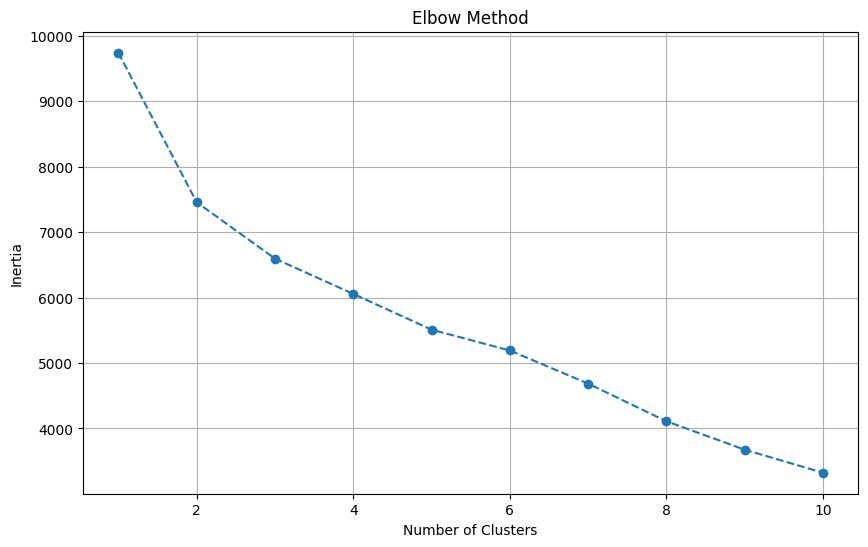

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a range of clusters
cluster_range = range(1, 11)

# Compute KMeans for each number of clusters
inertias = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(normalized_data)
    inertias.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertias, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [37]:
# kmeans = KMeans(n_clusters=2)
# kmeans.fit(org_5_df_dropped_2)

Not so helpful since doesnt create a cluster column

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [22]:
# Applying KMeans algorithm
kmeans = KMeans(n_clusters=2, random_state=42)
X = org_5_df_dropped_2.values
clusters = kmeans.fit_predict(X)

# Adding cluster labels to the original DataFrame
org_5_df_dropped_2['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
org_5_df_dropped_2

,PostC_impact_shift_E_innovate,PREF_features_C_concentration,PREF_features_M_lockers,PREF_features_N_events,PREF_features_O_food,PREF_features_R_gym,PREF_features_S_relax,PREF_features_T_greenspace,PREF_WFK_rate_home,PostC_impact_shift_A_focus,...,DEMO_Dept_Finance,DEMO_Dept_Human Resources,DEMO_Dept_Information Systems / IT,DEMO_Dept_Management,DEMO_Dept_Marketing,DEMO_Dept_Operations and Support,DEMO_Dept_Product Development,DEMO_Dept_Sales & Service,DEMO_Dept_Workplace & Tech Services,Cluster
0,0.0,1,1,1,1,1,1,1,5.00,0.0,...,0,0,0,0,0,1,0,0,0,0
1,2.5,1,1,1,1,1,1,1,3.75,1.0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,1,1,1,1,1,1,1,5.00,0.0,...,0,0,0,0,0,1,0,0,0,0
3,4.0,1,1,1,1,1,1,1,0.00,4.0,...,0,0,0,0,0,1,0,0,0,1
4,0.0,1,1,1,1,1,1,1,5.00,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,1.0,1,1,1,1,1,1,1,1.25,2.5,...,0,0,0,0,0,0,0,0,1,1
537,1.0,1,1,1,1,1,1,1,1.25,1.0,...,0,0,0,0,0,0,0,0,1,0
538,1.0,1,1,1,1,1,1,1,1.25,1.0,...,0,0,0,0,0,0,0,0,1,0
539,4.0,1,1,1,1,1,1,1,1.25,4.0,...,0,0,0,0,0,0,0,0,1,1


In [24]:
cluster_means = org_5_df_dropped_2.groupby('Cluster').mean()
cluster_means

,PostC_impact_shift_E_innovate,PREF_features_C_concentration,PREF_features_M_lockers,PREF_features_N_events,PREF_features_O_food,PREF_features_R_gym,PREF_features_S_relax,PREF_features_T_greenspace,PREF_WFK_rate_home,PostC_impact_shift_A_focus,...,DEMO_Dept_Engineering,DEMO_Dept_Finance,DEMO_Dept_Human Resources,DEMO_Dept_Information Systems / IT,DEMO_Dept_Management,DEMO_Dept_Marketing,DEMO_Dept_Operations and Support,DEMO_Dept_Product Development,DEMO_Dept_Sales & Service,DEMO_Dept_Workplace & Tech Services
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1.591837,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.163994,0.793003,...,0.279883,0.081633,0.069971,0.000000,0.032070,0.099125,0.029155,0.078717,0.230321,0.008746
1,4.133838,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.647727,3.242424,...,0.297980,0.050505,0.075758,0.005051,0.015152,0.095960,0.020202,0.116162,0.207071,0.020202


from matplotlib import pyplot as plt
cluster_means['PostC_impact_shift_E_innovate'].plot(kind='hist', bins=20, title='PostC_impact_shift_E_innovate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_means['PREF_WFK_rate_home'].plot(kind='hist', bins=20, title='PREF_WFK_rate_home')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_means['PostC_impact_shift_A_focus'].plot(kind='hist', bins=20, title='PostC_impact_shift_A_focus')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_means['PostC_impact_shift_C_collab'].plot(kind='hist', bins=20, title='PostC_impact_shift_C_collab')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_means.plot(kind='scatter', x='PostC_impact_shift_E_innovate', y='PREF_WFK_rate_home', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_means.plot(kind='scatter', x='PREF_WFK_rate_home', y='PostC_impact_shift_A_focus', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_means.plot(kind='scatter', x='PostC_impact_shift_A_focus', y='PostC_impact_shift_C_collab', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_means.plot(kind='scatter', x='PostC_impact_shift_C_collab', y='PostC_impact_shift_G_teammeetings', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PostC_impact_shift_E_innovate']
  ys = series['PREF_WFK_rate_home']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cluster_means.sort_values('PostC_impact_shift_E_innovate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PostC_impact_shift_E_innovate')
_ = plt.ylabel('PREF_WFK_rate_home')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PostC_impact_shift_E_innovate']
  ys = series['DEMO_Dept_Finance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cluster_means.sort_values('PostC_impact_shift_E_innovate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PostC_impact_shift_E_innovate')
_ = plt.ylabel('DEMO_Dept_Finance')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PostC_impact_shift_E_innovate']
  ys = series['DEMO_Dept_Management']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cluster_means.sort_values('PostC_impact_shift_E_innovate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PostC_impact_shift_E_innovate')
_ = plt.ylabel('DEMO_Dept_Management')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PostC_impact_shift_E_innovate']
  ys = series['DEMO_Dept_Marketing']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cluster_means.sort_values('PostC_impact_shift_E_innovate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PostC_impact_shift_E_innovate')
_ = plt.ylabel('DEMO_Dept_Marketing')

from matplotlib import pyplot as plt
cluster_means['PostC_impact_shift_E_innovate'].plot(kind='line', figsize=(8, 4), title='PostC_impact_shift_E_innovate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_means['PREF_WFK_rate_home'].plot(kind='line', figsize=(8, 4), title='PREF_WFK_rate_home')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_means['PostC_impact_shift_A_focus'].plot(kind='line', figsize=(8, 4), title='PostC_impact_shift_A_focus')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_means['PostC_impact_shift_C_collab'].plot(kind='line', figsize=(8, 4), title='PostC_impact_shift_C_collab')
plt.gca().spines[['top', 'right']].set_visible(False)

In [25]:
org_5_df_dropped_2.groupby(['Cluster']).count()

,PostC_impact_shift_E_innovate,PREF_features_C_concentration,PREF_features_M_lockers,PREF_features_N_events,PREF_features_O_food,PREF_features_R_gym,PREF_features_S_relax,PREF_features_T_greenspace,PREF_WFK_rate_home,PostC_impact_shift_A_focus,...,DEMO_Dept_Engineering,DEMO_Dept_Finance,DEMO_Dept_Human Resources,DEMO_Dept_Information Systems / IT,DEMO_Dept_Management,DEMO_Dept_Marketing,DEMO_Dept_Operations and Support,DEMO_Dept_Product Development,DEMO_Dept_Sales & Service,DEMO_Dept_Workplace & Tech Services
Cluster,,,,,,,,,,,,,,,,,,,,,
0,343,343,343,343,343,343,343,343,343,343,...,343,343,343,343,343,343,343,343,343,343
1,198,198,198,198,198,198,198,198,198,198,...,198,198,198,198,198,198,198,198,198,198


In [ ]:
# Group by 'cluster' and 'job_function', then count the occurrences
cluster_job_counts = org_5_df_dropped_2.groupby(['cluster', 'job_function']).size().reset_index(name='count')

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='count', hue='job_function', data=cluster_job_counts)
plt.title('People per Job Function in Different Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

'''## above would be ideal but we already converted the job functions to dummy variables'''

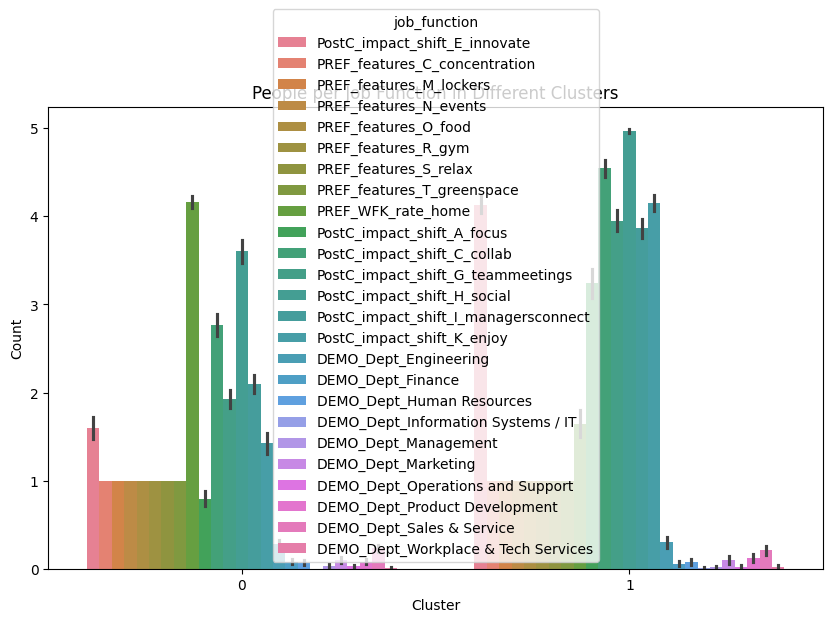

In [35]:
# Melt the DataFrame to make it suitable for plotting
df_melted = pd.melt(org_5_df_dropped_2, id_vars='Cluster', var_name='job_function', value_name='count')

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='count', hue='job_function', data=df_melted)
plt.title('People per Job Function in Different Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [36]:
org_5_df_dropped_2.columns

Index(['PostC_impact_shift_E_innovate', 'PREF_features_C_concentration',
       'PREF_features_M_lockers', 'PREF_features_N_events',
       'PREF_features_O_food', 'PREF_features_R_gym', 'PREF_features_S_relax',
       'PREF_features_T_greenspace', 'PREF_WFK_rate_home',
       'PostC_impact_shift_A_focus', 'PostC_impact_shift_C_collab',
       'PostC_impact_shift_G_teammeetings', 'PostC_impact_shift_H_social',
       'PostC_impact_shift_I_managersconnect', 'PostC_impact_shift_K_enjoy',
       'DEMO_Dept_Engineering', 'DEMO_Dept_Finance',
       'DEMO_Dept_Human Resources', 'DEMO_Dept_Information Systems / IT',
       'DEMO_Dept_Management', 'DEMO_Dept_Marketing',
       'DEMO_Dept_Operations and Support', 'DEMO_Dept_Product Development',
       'DEMO_Dept_Sales & Service', 'DEMO_Dept_Workplace & Tech Services',
       'Cluster'],
      dtype='object')

In [44]:
org_5_df_dropped_2.filter(regex="DEMO_|Cluster")

,DEMO_Dept_Engineering,DEMO_Dept_Finance,DEMO_Dept_Human Resources,DEMO_Dept_Information Systems / IT,DEMO_Dept_Management,DEMO_Dept_Marketing,DEMO_Dept_Operations and Support,DEMO_Dept_Product Development,DEMO_Dept_Sales & Service,DEMO_Dept_Workplace & Tech Services,Cluster
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
536,0,0,0,0,0,0,0,0,0,1,1
537,0,0,0,0,0,0,0,0,0,1,0
538,0,0,0,0,0,0,0,0,0,1,0
539,0,0,0,0,0,0,0,0,0,1,1


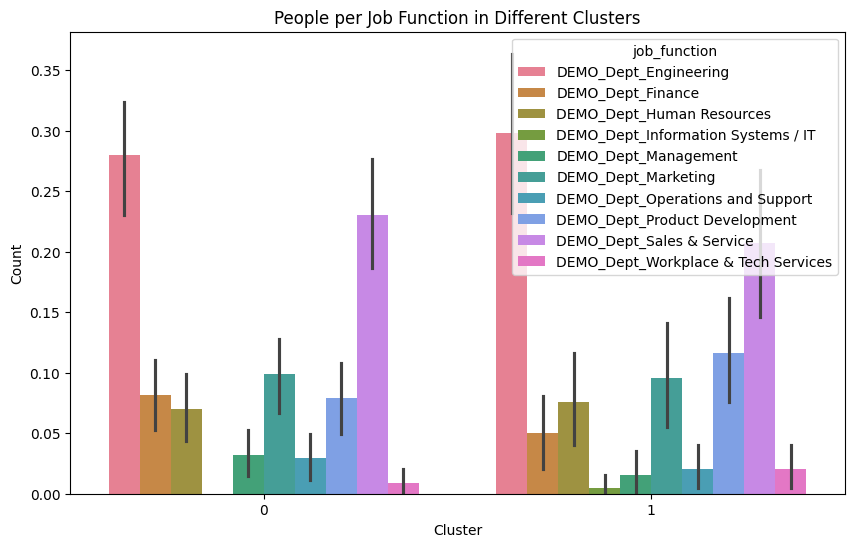

In [49]:
#Instead of melting all columns, melt only the department columns of the dataframe
# Melt the DataFrame to make it suitable for plotting
org_5_df_dropped_3 = org_5_df_dropped_2.filter(regex="DEMO_|Cluster")
df_melted = pd.melt(org_5_df_dropped_3, id_vars='Cluster', var_name='job_function', value_name='count')

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='count', hue='job_function', data=df_melted, palette = "husl")
plt.title('People per Job Function in Different Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()
#org_5_df_dropped_2.filter(regex="DEMO_")

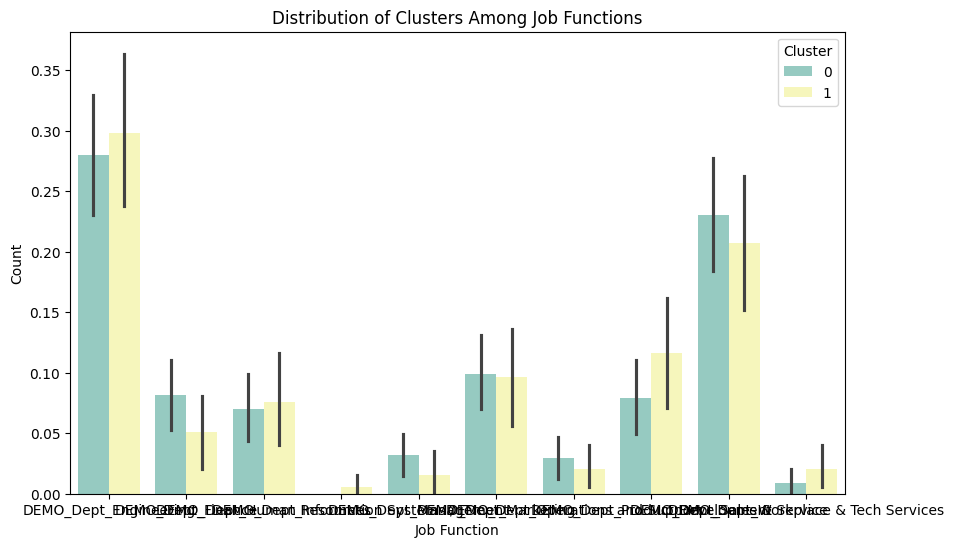

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x='job_function', y='count', hue='Cluster', data=df_melted, palette='Set3')
plt.title('Distribution of Clusters Among Job Functions')
plt.xlabel('Job Function')
plt.ylabel('Count')
plt.show()

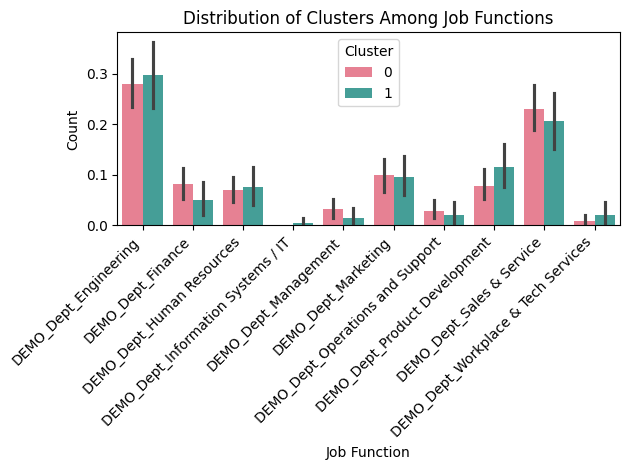

In [57]:
sns.barplot(x='job_function', y='count', hue='Cluster', data=df_melted, palette="husl")
plt.title('Distribution of Clusters Among Job Functions')
plt.xlabel('Job Function')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

# Melt the DataFrame to make it suitable for plotting
df_melted = pd.melt(org_5_df_dropped_2, id_vars='Cluster', var_name='job_function', value_name='count')

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y=count, hue=job_function, data=df_melted)
plt.title('People per Job Function in Different Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [29]:
org_5_df_dropped_2

,PostC_impact_shift_E_innovate,PREF_features_C_concentration,PREF_features_M_lockers,PREF_features_N_events,PREF_features_O_food,PREF_features_R_gym,PREF_features_S_relax,PREF_features_T_greenspace,PREF_WFK_rate_home,PostC_impact_shift_A_focus,...,DEMO_Dept_Finance,DEMO_Dept_Human Resources,DEMO_Dept_Information Systems / IT,DEMO_Dept_Management,DEMO_Dept_Marketing,DEMO_Dept_Operations and Support,DEMO_Dept_Product Development,DEMO_Dept_Sales & Service,DEMO_Dept_Workplace & Tech Services,Cluster
0,0.0,1,1,1,1,1,1,1,5.00,0.0,...,0,0,0,0,0,1,0,0,0,0
1,2.5,1,1,1,1,1,1,1,3.75,1.0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,1,1,1,1,1,1,1,5.00,0.0,...,0,0,0,0,0,1,0,0,0,0
3,4.0,1,1,1,1,1,1,1,0.00,4.0,...,0,0,0,0,0,1,0,0,0,1
4,0.0,1,1,1,1,1,1,1,5.00,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,1.0,1,1,1,1,1,1,1,1.25,2.5,...,0,0,0,0,0,0,0,0,1,1
537,1.0,1,1,1,1,1,1,1,1.25,1.0,...,0,0,0,0,0,0,0,0,1,0
538,1.0,1,1,1,1,1,1,1,1.25,1.0,...,0,0,0,0,0,0,0,0,1,0
539,4.0,1,1,1,1,1,1,1,1.25,4.0,...,0,0,0,0,0,0,0,0,1,1


## 3. Data Visualizations and Analysis for a single organisation (Org 3)


In [ ]:
#5 largest departments
employees_counts = org_3['DEMO_Dept'].value_counts()
employees_counts

plt.figure(figsize=(20,15))
sns.barplot(employees_counts[0:5])
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Five Largest Departments in Org 3')

NameError: name 'org_3' is not defined

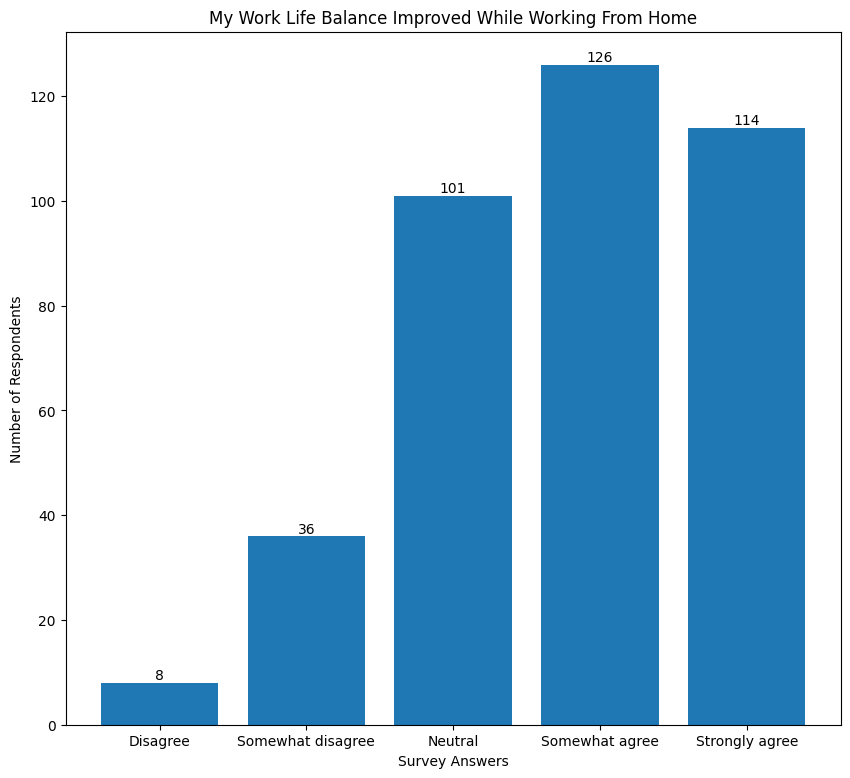

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,9))
# Sample data
categories = [1, 2, 3, 4, 5]
values = [8, 36, 101, 126, 114]

# Plotting the data with specified labels
plt.bar(categories, values, tick_label=[
    'Disagree', 'Somewhat disagree', 'Neutral', 'Somewhat agree', 'Strongly agree'])

# Adding labels and title
plt.xlabel('Survey Answers')
plt.ylabel('Number of Respondents')
plt.title('My Work Life Balance Improved While Working From Home')

#Add an annotation for each bar
for i in range(len(categories)):
    plt.text(categories[i], values[i], str(values[i]), ha='center', va='bottom')

# Displaying the plot
plt.show()


In [ ]:
collab_tools = org_3['PREF_CollabSpace_C_CollabTools'].value_counts()
collab_tools

plt.figure(figsize=(15,8))
sns.barplot(collab_tools)
plt.xlabel('Survey Answers')
plt.ylabel('Number of Respondents')
plt.title('How Important are Collaboration Tools for a Productive Collaborative Space?')

NameError: name 'org_3' is not defined

In [ ]:
percentage_columns = ['OBSV_PreC_meeting_A_inperson', 'OBSV_PreC_meeting_B_hyrbid', 'OBSV_PreC_meeting_C_remote']
custom_names = ['In-person Meetings', 'Hybrid Meetings', 'Remote Meetings']  # Custom names for the legend

for column, name in zip(percentage_columns, custom_names):
    sns.histplot(org_3[column], kde=True, label=name, alpha=0.9)

plt.title('Frequency Distribution of Percentage Columns')
plt.xlabel('Percentage Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given array
data = np.array(org_3['OBSV_PreC_wiOffice_A_desk'])
ranges = [(0.0, 0.3), (0.3, 0.6), (0.6, 1.),]

# Initialize counts for each group
counts = [0] * len(ranges)

# Count occurrences of values falling into each range
for value in data:
    for i, (start, end) in enumerate(ranges):
        if start <= value <= end:
            counts[i] += 1
            break

# Define more descriptive labels for each group
descriptive_labels = [
    'Rarely in Desk (0-33% Time in the Office)',
    'Occasionally in Desk (33-66% Time in the Office)',
    'Frequently in Desk (66-100% Time in the Office)'
]

# Plot the pie chart with the new labels
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=descriptive_labels, autopct='%1.1f%%', startangle=140)
plt.legend(title="Time Spent in Desk", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Percentage of Time Working in the Desk')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given array
data = np.array(org_3['OBSV_PreC_wiOffice_A_desk'])
ranges = [(0.0, 0.3), (0.3, 0.6), (0.6, 1.),]

# Initialize counts for each group
counts = [0] * len(ranges)

# Count occurrences of values falling into each range
for value in data:
    for i, (start, end) in enumerate(ranges):
        if start <= value <= end:
            counts[i] += 1
            break

# Define more descriptive labels for each group
descriptive_labels = [
    'Rarely in Desk (0-33% Time in the Office)',
    'Occasionally in Desk (33-66% Time in the Office)',
    'Frequently in Desk (66-100% Time in the Office)'
]

# Plot the pie chart with the new labels
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=descriptive_labels, autopct='%1.1f%%', startangle=140)
plt.legend(title="Time Spent in Desk", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Percentage of Time Working in the Desk')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
pro_1 = org_3['PostC_impact_shift_B_productive'].mean()
pro_2 = org_3['PostC_impact_shift_C_collab'].mean()
pro_3 = org_3['PostC_impact_shift_D_videoconf'].mean()
pro_4 = org_3['PostC_impact_shift_E_innovate'].mean()
pro_5 = org_3['PostC_impact_shift_F_colleagueaccess'].mean()

Pro_dict = {
    'Ability to do individual, concentrated work': pro_1,
    'Ability to Collaborate': pro_2,
    'Ability to Connect to Video Conference': pro_3,
    'Ability to Innovate': pro_4,
    'Accessibility to Colleagues': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(15, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to do individual, concentrated work',
    'Ability to Collaborate',
    'Ability to Connect to Video Conference',
    'Ability to Innovate',
    'Accessibility to Colleagues'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Technical Productivity (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])

plt.tight_layout()
plt.show()

In [ ]:
# Productivity per Motivation, Focus, and Well-being

pro_1 = org_3['PostC_impact_shift_A_focus'].mean()
pro_2 = org_3['PostC_impact_shift_H_social'].mean()
pro_3 = org_3['PostC_impact_shift_I_managersconnect'].mean()
pro_4 = org_3['PostC_impact_shift_J_client'].mean()
pro_5 = org_3['PostC_impact_shift_K_enjoy'].mean()

Pro_dict = {
    'Ability to focus': pro_1,
    'Ability to Socially Connect with Colleagues': pro_2,
    'Ability to Connect to Connect with Managers': pro_3,
    'Ability to Connect with Clients': pro_4,
    'Ability to Enjoy Work': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to focus',
    'Ability to Socially Connect with Colleagues',
    'Ability to Connect to Connect with Managers',
    'Ability to Connect with Clients',
    'Ability to Enjoy Work'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Well-Being and Work Satisfaction (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])

plt.tight_layout()
plt.show()

## 4. Measures of Productivity


#### To continue studying productivity and find out what are the potential factors made respondents would prefer at home or at office to produce a greater production of work, enabling us to study the drivers/predictors making respondents to answer in such ways. Even though are not able to find direct factors of increasing productivity, the result of studying such pattern are still somehow sigificant to understand employees producitity.

#### For independent variables we selected {'PREF_features_A_chair':'PREF_features_T_greenspace'} under category: Workplace Features as independent variable because It has the best breakdown of physical feature for employees during work, which are another category (other than mental) of being directly associated with workspace setting

#### For dependent Variables, we only selected {'PostC_impact_shift_A_focus', 'PostC_impact_shift_C_collab', 'PostC_impact_shift_E_innovate' ,'PostC_impact_shift_F_colleagueaccess'} for four reasons as follows: 1) There are no direct measurement nor indexes quantifying "Productivity". 2) They are assoicated with our definition of productivity: employee work freely without feeling distracted or overwhelmed. 3) They the only attributes where at least 5 org has answered and also Fundamentally isolated the preference of employees at home and vs. at office, which can best reduce confounding bias. It is explained as follows:

#### However, due to the the missing data on independent variable, we can only conduct regression model for each org seperatedly based on their available attributes (columns) which interpretation can be assessed by the organization level. On the other hand, we would like to exclude analysis for Org 5 because they only respond with a mean of 1.0 (out of 5.0) on  8 columns which considered extreme to the end result.

#### Technical Productivity

In [ ]:
# Technical Productivity (Org 1)

pro_1 = org_1['PostC_impact_shift_B_productive'].mean()
pro_2 = org_1['PostC_impact_shift_C_collab'].mean()
pro_3 = org_1['PostC_impact_shift_D_videoconf'].mean()
pro_4 = org_1['PostC_impact_shift_E_innovate'].mean()
pro_5 = org_1['PostC_impact_shift_F_colleagueaccess'].mean()

Pro_dict = {
    'Ability to do individual, concentrated work': pro_1,
    'Ability to Collaborate': pro_2,
    'Ability to Connect to Video Conference': pro_3,
    'Ability to Innovate': pro_4,
    'Accessibility to Colleagues': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to do individual, concentrated work',
    'Ability to Collaborate',
    'Ability to Connect to Video Conference',
    'Ability to Innovate',
    'Accessibility to Colleagues'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Technical Productivity (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])
plt.text(0.8, -0.5, '*Note: Empty columns indicate that the corresponding question has been left unanswered by the respective organizations', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Technical Productivity (Org 2)

pro_1 = org_2['PostC_impact_shift_B_productive'].mean()
pro_2 = org_2['PostC_impact_shift_C_collab'].mean()
pro_3 = org_2['PostC_impact_shift_D_videoconf'].mean()
pro_4 = org_2['PostC_impact_shift_E_innovate'].mean()
pro_5 = org_2['PostC_impact_shift_F_colleagueaccess'].mean()

Pro_dict = {
    'Ability to do individual, concentrated work': pro_1,
    'Ability to Collaborate': pro_2,
    'Ability to Connect to Video Conference': pro_3,
    'Ability to Innovate': pro_4,
    'Accessibility to Colleagues': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to do individual, concentrated work',
    'Ability to Collaborate',
    'Ability to Connect to Video Conference',
    'Ability to Innovate',
    'Accessibility to Colleagues'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Technical Productivity (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])
plt.text(0.8, -0.5, '*Note: Empty columns indicate that the corresponding question has been left unanswered by the respective organizations', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Technical Productivity (Org 3)

pro_1 = org_3['PostC_impact_shift_B_productive'].mean()
pro_2 = org_3['PostC_impact_shift_C_collab'].mean()
pro_3 = org_3['PostC_impact_shift_D_videoconf'].mean()
pro_4 = org_3['PostC_impact_shift_E_innovate'].mean()
pro_5 = org_3['PostC_impact_shift_F_colleagueaccess'].mean()

Pro_dict = {
    'Ability to do individual, concentrated work': pro_1,
    'Ability to Collaborate': pro_2,
    'Ability to Connect to Video Conference': pro_3,
    'Ability to Innovate': pro_4,
    'Accessibility to Colleagues': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to do individual, concentrated work',
    'Ability to Collaborate',
    'Ability to Connect to Video Conference',
    'Ability to Innovate',
    'Accessibility to Colleagues'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Technical Productivity (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])
plt.text(0.8, -0.5, '*Note: Empty columns indicate that the corresponding question has been left unanswered by the respective organizations', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Technical Productivity (Org 4)

pro_1 = org_4['PostC_impact_shift_B_productive'].mean()
pro_2 = org_4['PostC_impact_shift_C_collab'].mean()
pro_3 = org_4['PostC_impact_shift_D_videoconf'].mean()
pro_4 = org_4['PostC_impact_shift_E_innovate'].mean()
pro_5 = org_4['PostC_impact_shift_F_colleagueaccess'].mean()

Pro_dict = {
    'Ability to do individual, concentrated work': pro_1,
    'Ability to Collaborate': pro_2,
    'Ability to Connect to Video Conference': pro_3,
    'Ability to Innovate': pro_4,
    'Accessibility to Colleagues': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to do individual, concentrated work',
    'Ability to Collaborate',
    'Ability to Connect to Video Conference',
    'Ability to Innovate',
    'Accessibility to Colleagues'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Technical Productivity (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])
plt.text(0.8, -0.5, '*Note: Empty columns indicate that the corresponding question has been left unanswered by the respective organizations', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Technical Productivity (Org 5)

pro_1 = org_5['PostC_impact_shift_B_productive'].mean()
pro_2 = org_5['PostC_impact_shift_C_collab'].mean()
pro_3 = org_5['PostC_impact_shift_D_videoconf'].mean()
pro_4 = org_5['PostC_impact_shift_E_innovate'].mean()
pro_5 = org_5['PostC_impact_shift_F_colleagueaccess'].mean()

Pro_dict = {
    'Ability to do individual, concentrated work': pro_1,
    'Ability to Collaborate': pro_2,
    'Ability to Connect to Video Conference': pro_3,
    'Ability to Innovate': pro_4,
    'Accessibility to Colleagues': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to do individual, concentrated work',
    'Ability to Collaborate',
    'Ability to Connect to Video Conference',
    'Ability to Innovate',
    'Accessibility to Colleagues'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Technical Productivity (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])
plt.text(0.8, -0.5, '*Note: Empty columns indicate that the corresponding question has been left unanswered by the respective organizations', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

###Social Productivity (Well-being, Satisfaction)


In [ ]:
# Productivity per Motivation, Focus, and Well-being (Org 1)

pro_1 = org_1['PostC_impact_shift_A_focus'].mean()
pro_2 = org_1['PostC_impact_shift_H_social'].mean()
pro_3 = org_1['PostC_impact_shift_I_managersconnect'].mean()
pro_4 = org_1['PostC_impact_shift_J_client'].mean()
pro_5 = org_1['PostC_impact_shift_K_enjoy'].mean()

Pro_dict = {
    'Ability to focus': pro_1,
    'Ability to Socially Connect with Colleagues': pro_2,
    'Ability to Connect to Connect with Managers': pro_3,
    'Ability to Connect with Clients': pro_4,
    'Ability to Enjoy Work': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to focus',
    'Ability to Socially Connect with Colleagues',
    'Ability to Connect to Connect with Managers',
    'Ability to Connect with Clients',
    'Ability to Enjoy Work'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Well-Being and Work Satisfaction (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])
plt.text(0.8, -0.5, '*Note: Empty columns indicate that the corresponding question has been left unanswered by the respective organizations', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Productivity per Motivation, Focus, and Well-being (Org 2)

pro_1 = org_2['PostC_impact_shift_A_focus'].mean()
pro_2 = org_2['PostC_impact_shift_H_social'].mean()
pro_3 = org_2['PostC_impact_shift_I_managersconnect'].mean()
pro_4 = org_2['PostC_impact_shift_J_client'].mean()
pro_5 = org_2['PostC_impact_shift_K_enjoy'].mean()

Pro_dict = {
    'Ability to focus': pro_1,
    'Ability to Socially Connect with Colleagues': pro_2,
    'Ability to Connect to Connect with Managers': pro_3,
    'Ability to Connect with Clients': pro_4,
    'Ability to Enjoy Work': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to focus',
    'Ability to Socially Connect with Colleagues',
    'Ability to Connect to Connect with Managers',
    'Ability to Connect with Clients',
    'Ability to Enjoy Work'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Well-Being and Work Satisfaction (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])
plt.text(0.8, -0.5, '*Note: Empty columns indicate that the corresponding question has been left unanswered by the respective organizations', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Productivity per Motivation, Focus, and Well-being (Org 3)

pro_1 = org_3['PostC_impact_shift_A_focus'].mean()
pro_2 = org_3['PostC_impact_shift_H_social'].mean()
pro_3 = org_3['PostC_impact_shift_I_managersconnect'].mean()
pro_4 = org_3['PostC_impact_shift_J_client'].mean()
pro_5 = org_3['PostC_impact_shift_K_enjoy'].mean()

Pro_dict = {
    'Ability to focus': pro_1,
    'Ability to Socially Connect with Colleagues': pro_2,
    'Ability to Connect to Connect with Managers': pro_3,
    'Ability to Connect with Clients': pro_4,
    'Ability to Enjoy Work': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to focus',
    'Ability to Socially Connect with Colleagues',
    'Ability to Connect to Connect with Managers',
    'Ability to Connect with Clients',
    'Ability to Enjoy Work'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Well-Being and Work Satisfaction (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])
plt.text(0.8, -0.5, '*Note: Empty columns indicate that the corresponding question has been left unanswered by the respective organizations', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Productivity per Motivation, Focus, and Well-being (Org 4)

pro_1 = org_4['PostC_impact_shift_A_focus'].mean()
pro_2 = org_4['PostC_impact_shift_H_social'].mean()
pro_3 = org_4['PostC_impact_shift_I_managersconnect'].mean()
pro_4 = org_4['PostC_impact_shift_J_client'].mean()
pro_5 = org_4['PostC_impact_shift_K_enjoy'].mean()

Pro_dict = {
    'Ability to focus': pro_1,
    'Ability to Socially Connect with Colleagues': pro_2,
    'Ability to Connect to Connect with Managers': pro_3,
    'Ability to Connect with Clients': pro_4,
    'Ability to Enjoy Work': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to focus',
    'Ability to Socially Connect with Colleagues',
    'Ability to Connect to Connect with Managers',
    'Ability to Connect with Clients',
    'Ability to Enjoy Work'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Well-Being and Work Satisfaction (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])
plt.text(0.8, -0.5, '*Note: Empty columns indicate that the corresponding question has been left unanswered by the respective organizations', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Productivity per Motivation, Focus, and Well-being (Org 5)

pro_1 = org_5['PostC_impact_shift_A_focus'].mean()
pro_2 = org_5['PostC_impact_shift_H_social'].mean()
pro_3 = org_5['PostC_impact_shift_I_managersconnect'].mean()
pro_4 = org_5['PostC_impact_shift_J_client'].mean()
pro_5 = org_5['PostC_impact_shift_K_enjoy'].mean()

Pro_dict = {
    'Ability to focus': pro_1,
    'Ability to Socially Connect with Colleagues': pro_2,
    'Ability to Connect to Connect with Managers': pro_3,
    'Ability to Connect with Clients': pro_4,
    'Ability to Enjoy Work': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to focus',
    'Ability to Socially Connect with Colleagues',
    'Ability to Connect to Connect with Managers',
    'Ability to Connect with Clients',
    'Ability to Enjoy Work'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Well-Being and Work Satisfaction (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])
plt.text(0.8, -0.5, '*Note: Empty columns indicate that the corresponding question has been left unanswered by the respective organizations', fontsize=10, ha='center')

plt.tight_layout()
plt.show()